> **Copyright &copy; 2020 CertifAI Sdn. Bhd.**<br>
 **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). \
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

# 02 - ARIMA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Stationarity

In [21]:
airpassengers = pd.read_csv('../../datasets/decomposition/AirPassengers.csv')

airpassengers_series = pd.Series(airpassengers['#Passengers'].values, 
                            index = pd.date_range('1949-01', periods = len(airpassengers), freq='M'))

Text(0.5, 1.0, 'airpassengers')

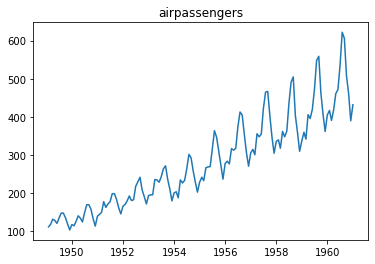

In [22]:
plt.plot(airpassengers_series)
plt.title('airpassengers')

There are many techniques (logarithm, exponential, de-trending, differencing) can be use to transform non-stationary series into stationary.

Which technique to use depend on the pattern of our time series

Since we has a series with increment variance, logarithm transformation can be use to smooth out the variance.

In [23]:
airpassengers_log = np.log(airpassengers_series)

Text(0.5, 1.0, 'log transformation')

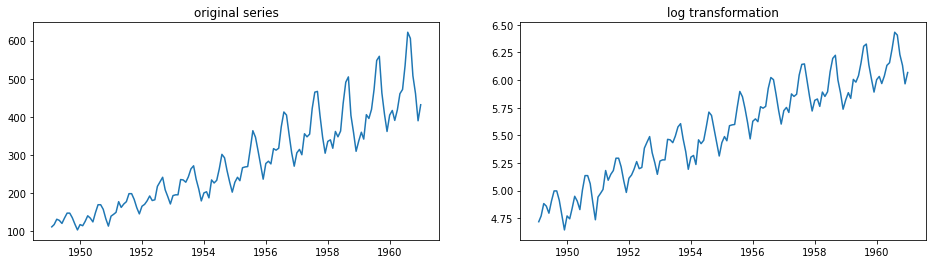

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_series)
ax1.set_title('original series')

ax2.plot(airpassengers_log)
ax2.set_title('log transformation')

differencing

In [25]:
airpassengers_diff = airpassengers_log.diff()

Text(0.5, 1.0, 'differencing')

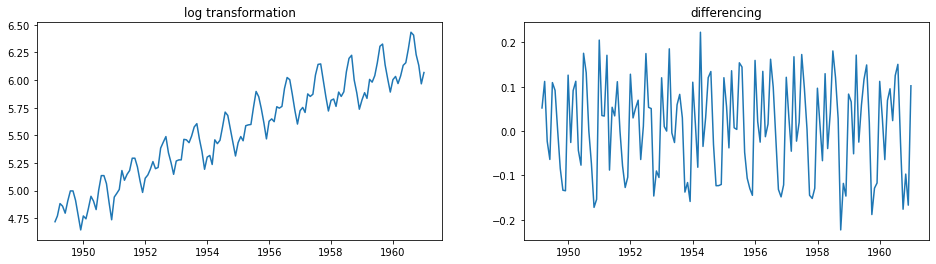

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_log)
ax1.set_title('log transformation')

ax2.plot(airpassengers_diff)
ax2.set_title('differencing')

## Stationarity Check

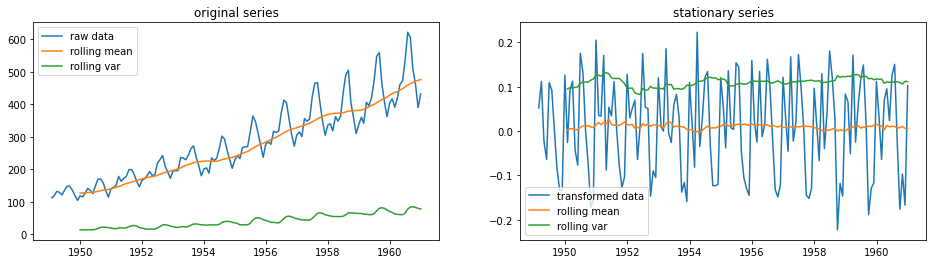

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_series, label = 'raw data')
ax1.plot(airpassengers_series.rolling(window=12).mean(), label="rolling mean");
ax1.plot(airpassengers_series.rolling(window=12).std(), label="rolling var");
ax1.set_title('original series')
ax1.legend()

ax2.plot(airpassengers_diff, label = 'transformed data')
ax2.plot(airpassengers_diff.rolling(window=12).mean(), label="rolling mean");
ax2.plot(airpassengers_diff.rolling(window=12).std(), label="rolling var");
ax2.set_title('stationary series')
ax2.legend()

### Augmented Dickey-Fuller Test (ADF)

ADF is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present.

A time series is stationary if a single shift in time doesn’t change the time series statistical properties, in which case unit root does not exist.

The Null and Alternate hypothesis of the Augmented Dickey-Fuller test is defined as follows:
- Null Hypothesis states there is the presence of a unit root.
- Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

In [28]:
def print_adf_result(adf_result):
    df_results = pd.Series(adf_result[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    
    for key, value in adf_result[4].items():
        df_results['Critical Value (%s)'% key] = value
    print('Augmented Dickey-Fuller Test Results:')
    print(df_results)

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(airpassengers_series, maxlag=12)
print_adf_result(result)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        1.564685
P-Value                   0.997748
# Lags Used              12.000000
# Observations Used     131.000000
Critical Value (1%)      -3.481282
Critical Value (5%)      -2.883868
Critical Value (10%)     -2.578677
dtype: float64


In [30]:
result = adfuller(airpassengers_diff[1:], maxlag=12)
print_adf_result(result)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.053032
P-Value                   0.030230
# Lags Used              12.000000
# Observations Used     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


### Test Stationary using Autocorrelation Function (ACF)

http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.graphics.gofplots import qqplot
# from scipy.stats import probplot

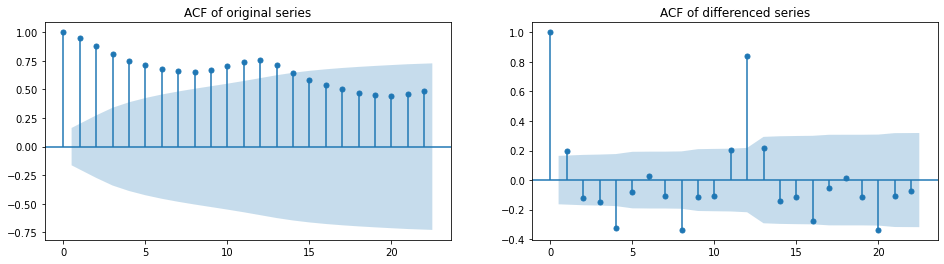

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

plot_acf(airpassengers_series, ax1)
ax1.set_title('ACF of original series')

plot_acf(airpassengers_diff[1:], ax2)
ax2.set_title('ACF of differenced series')

plt.show()

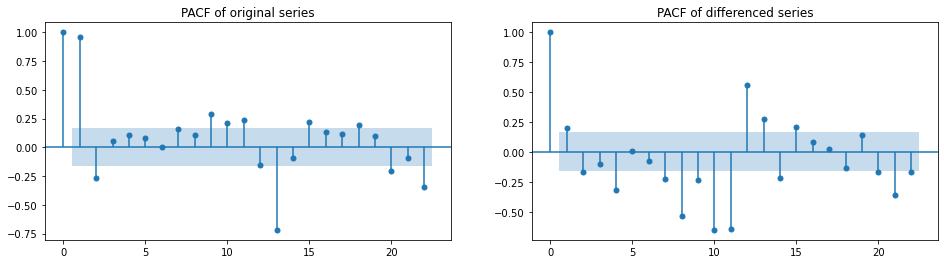

In [33]:
fig, (ax3, ax4) = plt.subplots(1,2, figsize=(16, 4))

plot_pacf(airpassengers_series, ax3)
ax3.set_title('PACF of original series')

plot_pacf(airpassengers_diff[1:], ax4)
ax4.set_title('PACF of differenced series')

plt.show()

# Simple Forecasting

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

airpassengers_train = airpassengers_series[:-24]
airpassengers_test = airpassengers_series[-24:]

airpassengers_log_train = airpassengers_log[:-24]
airpassengers_log_test = airpassengers_log[-24:]

airpassengers_diff_train = airpassengers_diff[:-24]
airpassengers_diff_test = airpassengers_diff[-24:]

ses = SimpleExpSmoothing(airpassengers_diff_train[1:])
ses = ses.fit()

ses_forecast = ses.forecast(24)

Text(0.5, 1.0, 'forecast for next 24 month')

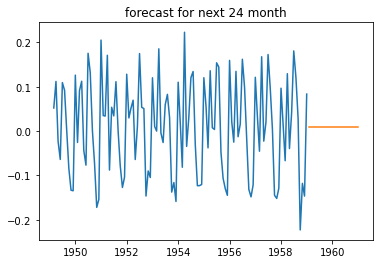

In [35]:
plt.plot(airpassengers_diff_train)
plt.plot(ses_forecast)
plt.title('forecast for next 24 month')

Inverse differencing

In [36]:
ses_forecast[0] = ses_forecast[0] + airpassengers_log_train[-1]
ses_forecast_inv_diff = ses_forecast.cumsum()

Inverse log transformation

In [38]:
ses_forecast_inv_log = np.exp(ses_forecast_inv_diff)

Text(0.5, 1.0, 'inverse log transformation')

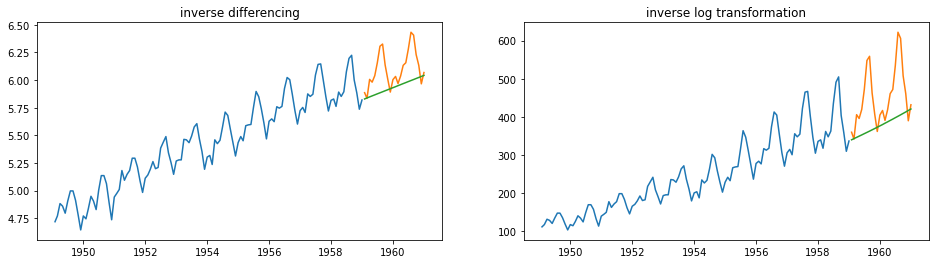

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_log_train)
ax1.plot(airpassengers_log_test)
ax1.plot(ses_forecast_inv_diff)
ax1.set_title('inverse differencing')

ax2.plot(airpassengers_train)
ax2.plot(airpassengers_test)
ax2.plot(ses_forecast_inv_log)
ax2.set_title('inverse log transformation')

# ARIMA

ARIMA is stand for Autoregressive Integrated Moving Average. The integrated refers to differencing hence it allow the model to support series with trend.

ARIMA expects data that is either not seasonal or has the seasonal component removed, thus we can perform seasonal differencing to eliminate the seasonality in the data.

In [40]:
from statsmodels.tsa.arima_model import ARIMA

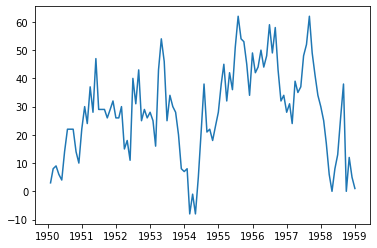

In [41]:
airpassengers_season_diff_train = airpassengers_train.diff(12)

plt.plot(airpassengers_season_diff_train)

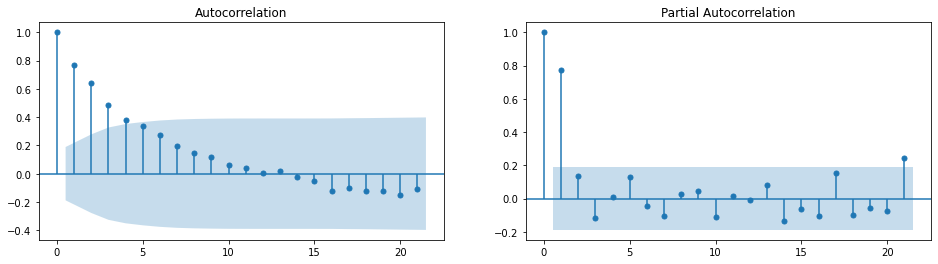

In [42]:
fig, (ax5, ax6) = plt.subplots(1,2, figsize=(16, 4))

plot_acf(airpassengers_season_diff_train.dropna(), ax5)
ax3.set_title('ACF of differenced season seriess')

plot_pacf(airpassengers_season_diff_train.dropna(), ax6)
ax4.set_title('PACF of differenced season series')

plt.show()

In [43]:
#  Find d parameter for ARIMA
find_d = ARIMA(airpassengers_season_diff_train.dropna(), order=(0,0,0)).fit()
find_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                     ARMA(0, 0)   Log Likelihood                -453.118
Method:                           css   S.D. of innovations             16.064
Date:                Fri, 18 Dec 2020   AIC                            910.236
Time:                        10:49:25   BIC                            915.601
Sample:                    01-31-1950   HQIC                           912.411
                         - 12-31-1958                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2593      1.546     18.281      0.000      25.230      31.289
==============================================================================
"""

In [44]:
arima = ARIMA(airpassengers_season_diff_train.dropna(), order=(1,0,1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                     ARMA(1, 1)   Log Likelihood                -400.713
Method:                       css-mle   S.D. of innovations              9.840
Date:                Fri, 18 Dec 2020   AIC                            809.426
Time:                        10:49:26   BIC                            820.155
Sample:                    01-31-1950   HQIC                           813.776
                         - 12-31-1958                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7949      5.425      4.755      0.000      15.162      36.427
ar.L1.y        0.8562      0.062     13.714      0.000       0.734       0.979
ma.L1.y       -0.1512      0.107     -1.408      0.159      -0.362       0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1680           +0.0000j            1.1680            0.0000
MA.1            6.6125           +0.0000j            6.6125            0.0000
-----------------------------------------------------------------------------
"""

The values under *coef* are the weights of the respective terms. 

AIC and BIC is to tell how good is the model and can be use to compare with other models. The lower the AIC the better the model



## Residuals

Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:
- The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
- The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.
- The residuals have constant variance.
- The residuals are normally distributed.


Any forecasting method that does not satisfy these properties can be improved. However, that does not mean that forecasting methods that satisfy these properties cannot be improved. It is possible to have several different forecasting methods for the same data set, all of which satisfy these properties. Checking these properties is important in order to see whether a method is using all of the available information, but it is not a good way to select a forecasting method.

In [45]:
residuals = pd.Series(arima.resid)

In [46]:
import seaborn as sns

def check_residuals(series):
    fig = plt.figure(figsize=(16, 8))    
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series)
    ax1.set_title('residuals')
    
    ax2 = fig.add_subplot(gs[1,0])
    plot_acf(series, ax=ax2, title='ACF')
    
    ax3 = fig.add_subplot(gs[1,1])
    sns.kdeplot(series, ax=ax3)
    ax3.set_title('density')
    
    plt.show()

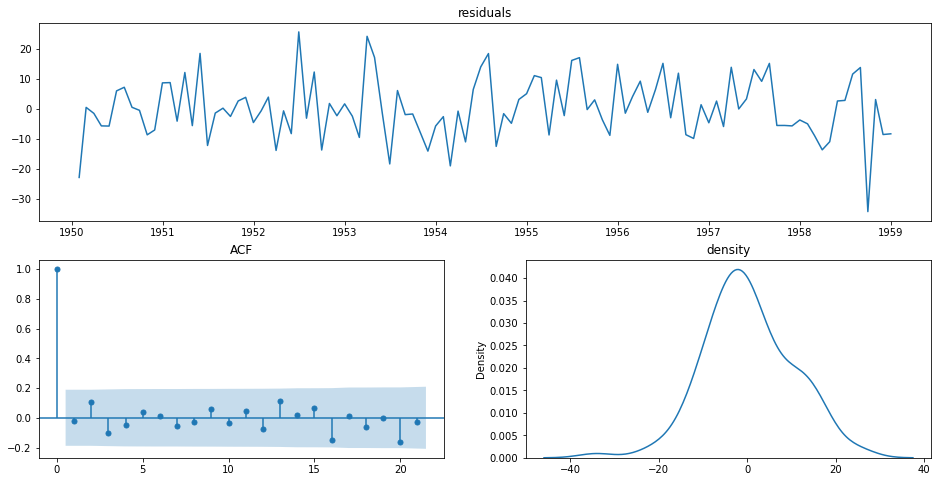

In [47]:
check_residuals(residuals)

In [48]:
arima_forecast, se, conf = arima.forecast(24)

arima_forecast = pd.Series(arima_forecast, index=airpassengers_test.index)
lower_series = pd.Series(conf[:, 0], index=airpassengers_test.index)
upper_series = pd.Series(conf[:, 1], index=airpassengers_test.index)

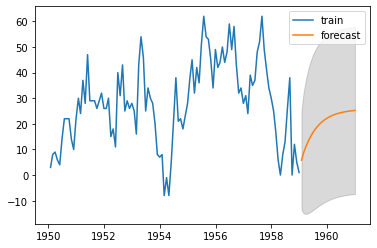

In [49]:
plt.plot(airpassengers_season_diff_train, label='train')
plt.plot(arima_forecast, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend()

In [50]:
def inverse_differencing(orig_data, diff_data, interval):
    output = orig_data[:interval].tolist()
    for i in range(interval, len(diff_data)):
        output.append(output[i-interval] + diff_data[i])
    return output

def inverse_differencing_forecast(orig_series, diff_series, forecast_series, interval):
    series_merge = diff_series.append(forecast_series)
    inverse_diff_series = pd.Series(inverse_differencing(orig_series, series_merge, interval), 
                                    index=series_merge.index)
    return inverse_diff_series[-len(forecast_series):]

def train_test_forecast_plot(train_series, test_series, forecast_series, lower_upper=None):
    plt.plot(train_series, label = 'train')
    plt.plot(test_series, label = 'test')
    plt.plot(forecast_series, label = 'forecast')

    if lower_upper is not None:
        plt.fill_between(lower_upper[0].index, lower_upper[0], 
                     lower_upper[1], color='k', alpha=.15)
    plt.legend()

In [51]:
# inverse differenced series back to original series
airpassengers_forecast_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, arima_forecast, 12)
airpassengers_lower_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, lower_series, 12)
airpassengers_upper_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, upper_series, 12)

In [54]:
type(airpassengers_train)

pandas.core.series.Series

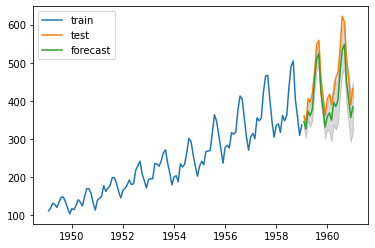

In [52]:
train_test_forecast_plot(airpassengers_train, airpassengers_test, airpassengers_forecast_series, 
                         [airpassengers_lower_series, airpassengers_upper_series])

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(airpassengers_test, airpassengers_forecast_series)
print('Test MSE: ', mse)

Test MSE:  2196.0734651120606


# SARIMA

Seasonal Autoregressive Integrated Moving Average (SARIMA) ia a method to forecast univariate time series with trend and seasonality.

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

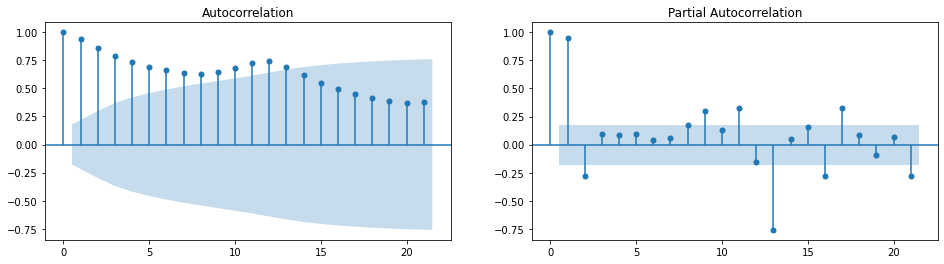

In [35]:
fig, (ax7, ax8) = plt.subplots(1,2, figsize=(16, 4))

plot_acf(airpassengers_train, ax7)
ax3.set_title('ACF of seasonal series')

plot_pacf(airpassengers_train, ax8)
ax4.set_title('PACF of seasonal series')

plt.show()

In [36]:
sarimax = SARIMAX(airpassengers_train, order=(3,1,1), seasonal_order=(0,1,0,12)).fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood                -397.385
Date:                             Fri, 18 Dec 2020   AIC                            804.771
Time:                                     10:37:09   BIC                            818.135
Sample:                                 01-31-1949   HQIC                           810.188
                                      - 12-31-1958                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5364      0.202      2.651      0.008       0.140       0.933
ar.L2          0.1857      0.145      1.277      0.202      -0.099       0.471
ar.L3         -0.1562      0.145     -1.074      0.283      -0.441       0.129
ma.L1         -0.7948      0.234     -3.400      0.001      -1.253      -0.337
sigma2        98.2491     13.823      7.107      0.000      71.156     125.342
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.55
Prob(Q):                              1.00   Prob(JB):                         0.28
Heteroskedasticity (H):               1.53   Skew:                            -0.09
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

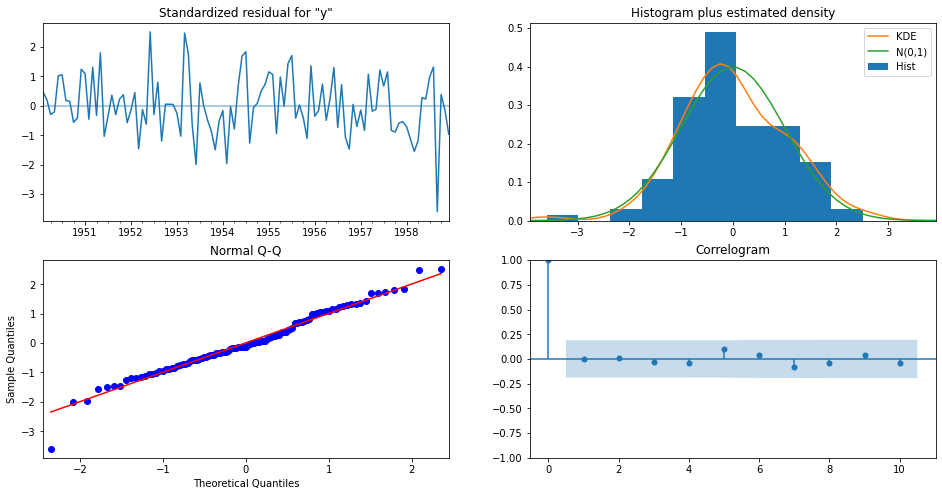

In [37]:
sarimax.plot_diagnostics(figsize=(16, 8))
plt.show()

In [38]:
sarimax_forecast = sarimax.get_forecast(24)
sarimax_forecast_conf_int = sarimax_forecast.conf_int()

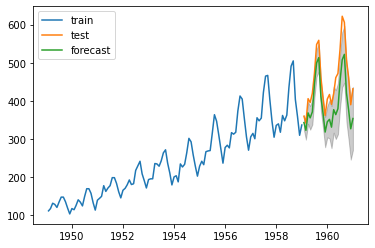

In [39]:
plt.plot(airpassengers_train, label='train')
plt.plot(airpassengers_test, label='test')
plt.plot(sarimax_forecast.predicted_mean, label='forecast')


plt.fill_between(sarimax_forecast_conf_int.index,
                 sarimax_forecast_conf_int.iloc[:, 0],
                 sarimax_forecast_conf_int.iloc[:, 1], color='k', alpha=.2)

plt.legend()


# Grid Search

Grid search is the process of performing exhaustive searching throught a manually specified parameters in order to determine the optimal values for a given model.

For example, ARIMA has the parameters p, d, and q. we can manually specify range of values for parameters p, d, q, and build models based on the all the combination of parameters in p, d, and q. The measurement for the models can be in-sample error (AIC, BIC), or out-sample error (MSE). Finally, the model with the lowest error will be selected.

In [40]:
param_p = [0,1,2,3,4,5]
param_d = [0,1] # ARIMA only support two times of differencing
param_q = [0,1,2]

In [41]:
best_error, best_params, best_model = None, None, None

for p in param_p:
    for d in param_d:
        for q in param_q:
            try:
                arima = ARIMA(airpassengers_season_diff_train.dropna(), order=(p,d,q)).fit()
                if best_error is None or arima.aic < best_error:
                    best_error = arima.aic
                    best_params = (p,d,q)
                    best_model = arima
                print('ARIMA({},{},{}), AIC={}'.format(p,d,q, arima.aic))
            except:
                pass
print('Best Error={}, Best Params={}'.format(best_error, best_params))

ARIMA(0,0,0), AIC=910.2364820860948
ARIMA(0,0,1), AIC=859.1128781864788
ARIMA(0,0,2), AIC=828.5246316416856
ARIMA(0,1,0), AIC=809.6542460236442
ARIMA(0,1,1), AIC=805.6496003606633
ARIMA(0,1,2), AIC=807.6283595011059
ARIMA(1,0,0), AIC=809.3937465782774
ARIMA(1,0,1), AIC=809.4263830457282
ARIMA(1,0,2), AIC=809.5605918480121
ARIMA(1,1,0), AIC=805.2809094674369
ARIMA(1,1,1), AIC=806.8126968994834
ARIMA(2,0,0), AIC=808.8406195222824
ARIMA(2,0,1), AIC=809.6502710767638
ARIMA(2,0,2), AIC=810.8559426311949
ARIMA(2,1,0), AIC=807.0927383370306
ARIMA(2,1,1), AIC=808.7922440795153
ARIMA(2,1,2), AIC=806.1953589118502
ARIMA(3,0,0), AIC=809.3561451224118
ARIMA(3,0,1), AIC=811.2314792085158
ARIMA(3,0,2), AIC=810.6915702861613
ARIMA(3,1,0), AIC=807.0752100440784
ARIMA(3,1,1), AIC=806.7712857661496
ARIMA(3,1,2), AIC=806.0101766497006
ARIMA(4,0,0), AIC=811.0125054424259
ARIMA(4,0,1), AIC=812.7557392584428
ARIMA(4,0,2), AIC=809.3569003837052
ARIMA(4,1,0), AIC=806.5985563765485
ARIMA(4,1,1), AIC=808.566381

In [42]:
arima_forecast, se, conf = best_model.forecast(24)

arima_forecast = pd.Series(arima_forecast, index=airpassengers_test.index)
lower_series = pd.Series(conf[:, 0], index=airpassengers_test.index)
upper_series = pd.Series(conf[:, 1], index=airpassengers_test.index)

In [43]:
# inverse differenced series back to original series
airpassengers_forecast_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, arima_forecast, 12)
airpassengers_lower_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, lower_series, 12)
airpassengers_upper_series = inverse_differencing_forecast(airpassengers_train, airpassengers_season_diff_train, upper_series, 12)

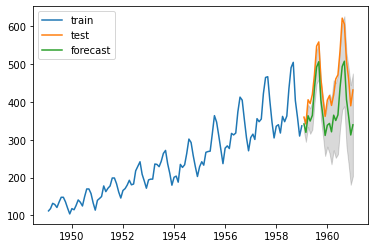

In [44]:
train_test_forecast_plot(airpassengers_train, airpassengers_test, airpassengers_forecast_series, 
                         [airpassengers_lower_series, airpassengers_upper_series])

In [45]:
mse = mean_squared_error(airpassengers_test, airpassengers_forecast_series)
print('Test MSE: ', mse)

Test MSE:  5569.352004651548


# Auto Arima

Pyramid brings R’s beloved `auto.arima` to Python

In [46]:
import pmdarima as pm
#scikit-learn version = 0.23.2


auto_arima = pm.arima.auto_arima(airpassengers_train, m=12,
                            trace=True, seasonal=True,
                            error_action='ignore',  
                            suppress_warnings=True)


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
auto_arima.summary()

In [ ]:
auto_arima_forecast = auto_arima.predict(n_periods=24)
auto_arima_forecast_series = pd.Series(auto_arima_forecast, index=airpassengers_test.index)

In [ ]:
train_test_forecast_plot(airpassengers_train, airpassengers_test, auto_arima_forecast_series, 
                         [airpassengers_lower_series, airpassengers_upper_series])

## Exercise

We will run through a simple exercise of building ARIMA model for time series data analysis. 

Tasks that you are required to perform are list down as comment. Please insert your codes below the comment. An approximation of number of lines *n* is provided as a guideline to help you.

### 1. Library and dataset loading

In [70]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline

# load dataset
df = pd.read_csv('../../datasets/others/furniture-sales.csv')

### 2. Data Pre-processing

In [56]:
# initial data 
df.head()

# setting DateTimeIndex since there is a datetime object conveniently 
df.DATE = pd.to_datetime(df.DATE, infer_datetime_format=True)
df = df.set_index(df.DATE)
df = df.asfreq("MS")

# remove date column
del df['DATE']

# rename column
df = df.rename(columns={'MRTSSM442USN': 'Furniture_Sales'})

# convert to Series
df = pd.Series(df.Furniture_Sales.values, index=df.index)

# display current Series
print(df.head())

# just extract and analyse data until the year 2006
df_subset = df.loc[:'2006']

# please perform a splitting to convert into train and test dataset
split_ratio = round(df_subset.shape[0]*0.8)
df_train = df_subset.iloc[:split_ratio]
df_test = df_subset.iloc[split_ratio:]

AttributeError: 'Series' object has no attribute 'DATE'

### 3. EDA

<AxesSubplot:xlabel='DATE'>

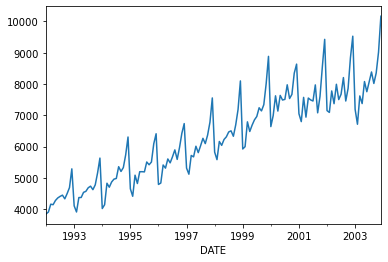

In [58]:
# plot a time plot
df_train.plot()

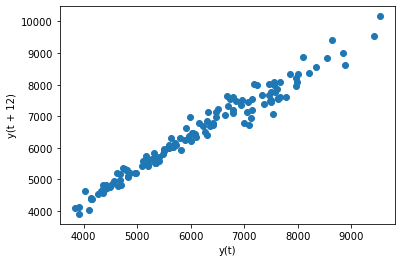

In [59]:
# plot a lag plot for lag of 12
pd.plotting.lag_plot(df_train, lag=12)
plt.show()

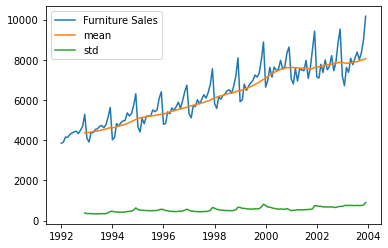

In [60]:
# Stationarity check of mean, variance and autocorrelation
plt.plot(df_train, label='Furniture Sales')
plt.plot(df_train.rolling(window=12).mean(), label='mean')
plt.plot(df_train.rolling(window=12).std(), label='std')
plt.legend()
plt.show()

In [61]:
# perform ADF test
def print_adf_result(adf_result):
    df_results = pd.Series(adf_result[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    
    for key, value in adf_result[4].items():
        df_results['Critical Value (%s)'% key] = value
    print('Augmented Dickey-Fuller Test Results:')
    print(df_results)
    

result = adfuller(df_train)
print_adf_result(result)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -0.845726
P-Value                   0.805320
# Lags Used              14.000000
# Observations Used     129.000000
Critical Value (1%)      -3.482088
Critical Value (5%)      -2.884219
Critical Value (10%)     -2.578864
dtype: float64


Obviously, the time series is not stationary. We will perform some transformations for it to be stationary.

<AxesSubplot:xlabel='DATE'>

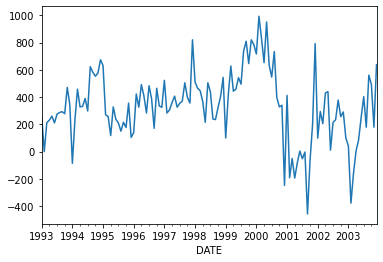

In [62]:
# seasonal differencing 
df_train_seasonal_diff = df_train.diff(12)


# display result after transformation
df_train_seasonal_diff.dropna().plot()

In [63]:
# inspect stationarity using ADF after differecing
result = adfuller(df_train_seasonal_diff.dropna())
print_adf_result(result)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.408730
P-Value                   0.010665
# Lags Used              11.000000
# Observations Used     120.000000
Critical Value (1%)      -3.486056
Critical Value (5%)      -2.885943
Critical Value (10%)     -2.579785
dtype: float64


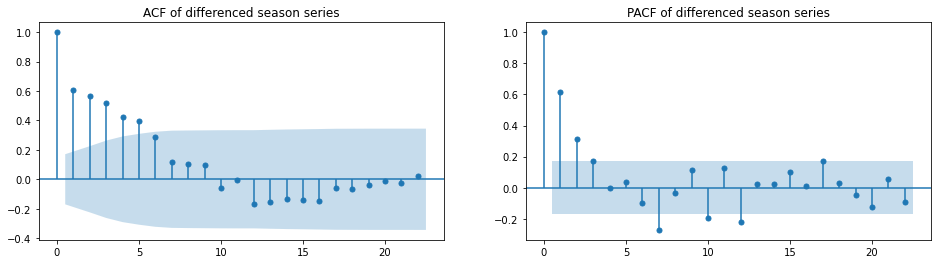

In [64]:
# inspect ACF and PACF to determine the hyperparameter to be used for ARIMA
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

plot_acf(df_train_seasonal_diff.dropna(), ax1)
ax1.set_title('ACF of differenced season series')

plot_pacf(df_train_seasonal_diff.dropna(), ax2)
ax2.set_title('PACF of differenced season series')

plt.show()

### 4. Model Building

In [65]:
# building ARIMA model
arima = ARIMA(df_train_seasonal_diff.dropna(), order=(3, 0, 3)).fit()

# display summary of model
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                     ARMA(3, 3)   Log Likelihood                -873.908
Method:                       css-mle   S.D. of innovations            177.852
Date:                Fri, 18 Dec 2020   AIC                           1763.816
Time:                        10:53:26   BIC                           1786.878
Sample:                    01-01-1993   HQIC                          1773.187
                         - 12-01-2003                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.9899     68.940      4.845      0.000     198.871     469.109
ar.L1.y       -0.2818      0.059     -4.737      0.000      -0.398      -0.165
ar.L2.y        0.0088      0.065      0.136      0.892      -0.118       0.136
ar.L3.y        0.8590      0.057     15.156      0.000       0.748       0.970
ma.L1.y        0.7298      0.111      6.564      0.000       0.512       0.948
ma.L2.y        0.5759      0.126      4.576      0.000       0.329       0.823
ma.L3.y       -0.3814      0.105     -3.624      0.000      -0.588      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5811           -0.8203j            1.0053           -0.3481
AR.2           -0.5811           +0.8203j            1.0053            0.3481
AR.3            1.1519           -0.0000j            1.1519           -0.0000
MA.1           -0.5557           -0.8315j            1.0001           -0.3438
MA.2           -0.5557           +0.8315j            1.0001            0.3438
MA.3            2.6214           -0.0000j            2.6214           -0.0000
-----------------------------------------------------------------------------
"""

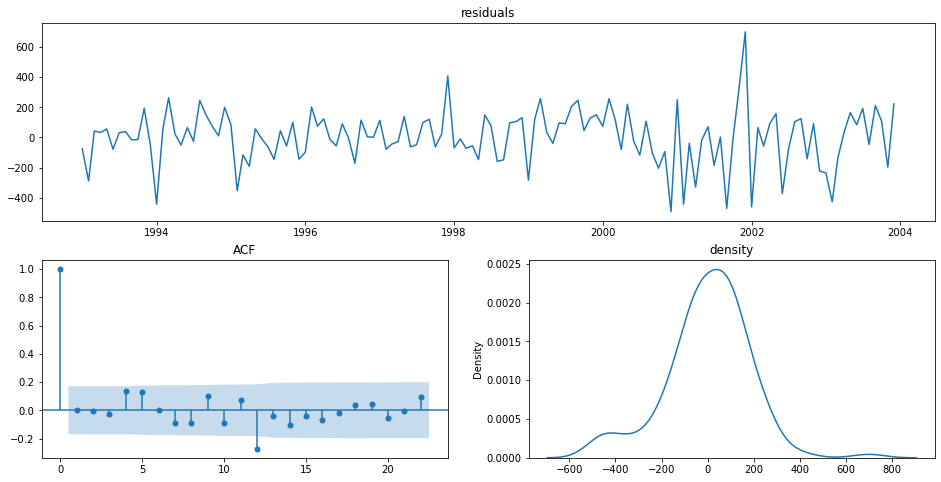

In [66]:
# residual analysis
residuals = pd.Series(arima.resid)

def check_residuals(series):
    fig = plt.figure(figsize=(16, 8))    
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series)
    ax1.set_title('residuals')
    
    ax2 = fig.add_subplot(gs[1,0])
    plot_acf(series, ax=ax2, title='ACF')
    
    ax3 = fig.add_subplot(gs[1,1])
    sns.kdeplot(series, ax=ax3)
    ax3.set_title('density')
    
    plt.show()
    
check_residuals(residuals)

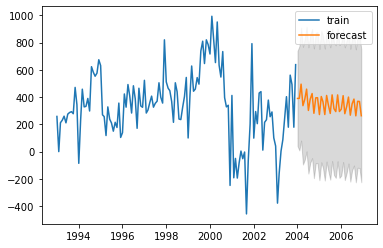

In [67]:
# perform forecast using the newly built ARIMA model
arima_forecast, se, conf = arima.forecast(len(df_subset)-split_ratio)

arima_forecast = pd.Series(arima_forecast, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

plt.plot(df_train_seasonal_diff, label='train')
plt.plot(arima_forecast, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend()

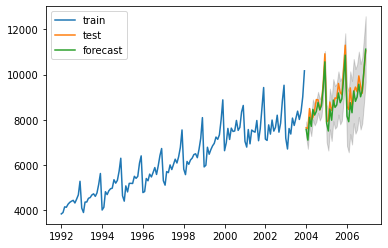

In [68]:
# perform inverse transformation
def inverse_differencing(orig_data, diff_data, interval):
    output = orig_data[:interval].tolist()
    for i in range(interval, len(diff_data)):
        output.append(output[i-interval] + diff_data[i])
    return output

def inverse_differencing_forecast(orig_series, diff_series, forecast_series, interval):
    series_merge = diff_series.append(forecast_series)
    inverse_diff_series = pd.Series(inverse_differencing(orig_series, series_merge, interval), 
                                    index=series_merge.index)
    return inverse_diff_series[-len(forecast_series):]

def train_test_forecast_plot(train_series, test_series, forecast_series, lower_upper=None):
    plt.plot(train_series, label = 'train')
    plt.plot(test_series, label = 'test')
    plt.plot(forecast_series, label = 'forecast')

    if lower_upper is not None:
        plt.fill_between(lower_upper[0].index, lower_upper[0], 
                     lower_upper[1], color='k', alpha=.15)
    plt.legend()
    
df_subset_forecast_series = inverse_differencing_forecast(df_train, df_train_seasonal_diff, arima_forecast, 12)
df_subset_lower_series = inverse_differencing_forecast(df_train, df_train_seasonal_diff, lower_series, 12)
df_subset_upper_series = inverse_differencing_forecast(df_train, df_train_seasonal_diff, upper_series, 12)

train_test_forecast_plot(df_train, df_test, df_subset_forecast_series, 
                         [df_subset_lower_series, df_subset_upper_series])


### 5. Model Evaluation

In [71]:
# Model evaluation
mse = mean_squared_error(df_test, df_subset_forecast_series)
print('Test MSE: ', mse)

Test MSE:  125719.42588239994


## References

1. https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788